# Part I - (Dataset Exploration Title)
## by OLUWASEUN ILORI

## Introduction
> This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area. 
A bike share program consists of making bicycles and/or electric bicycles available to the inhabitants of a city, so that they can rent a bike for short or longer distances. In particular, shared bikes are used to go to work, the gym, to school, to meet friends, etc. Thus, many stations are strategically distributed throughout the city, i.e. close to the most frequented public places, allowing people to easily and affordably rent and return the bikes from one mobility hub to another - [Source](https://www.pbsc.com/blog/2022/01/what-is-a-bike-share-program-and-how-does-it-work) Also note this dataset is only for `February 2019`.

>**Rubric Tip**: Your code should not generate any errors, and should use functions, loops where possible to reduce repetitive code. Prefer to use functions to reuse code statements.

> **Rubric Tip**: Document your approach and findings in markdown cells. Use comments and docstrings in code cells to document the code functionality.

>**Rubric Tip**: Markup cells should have headers and text that organize your thoughts, findings, and what you plan on investigating next.  



## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> Load in your dataset and describe its properties through the questions below. Try and motivate your exploration goals through this section.


In [2]:
df = pd.read_csv('201902-fordgobike-tripdata.csv')
print(df.shape)
df.head()

(183412, 16)


,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [3]:
print(df.shape)
df.dtypes

(183412, 16)


duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
dtype: object

In [4]:
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


In [5]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


### What is the structure of your dataset?

> This dataset consists of `183412` rows and `16` columns. [Data dict source](https://ride.citibikenyc.com/system-data) and [Github](https://github.com/BetaNYC/Bike-Share-Data-Best-Practices/wiki/Bike-share-open-data-schema)
* Trip Duration (seconds)
* Start Time and Date
* Stop Time and Date
* Start Station Name
* End Station Name
* Station ID
* Station Lat/Long
* Bike ID
* User Type (Customer = 24-hour pass or 3-day pass user; Subscriber = Annual Member)
* Gender
* Year of Birth

### What is/are the main feature(s) of interest in your dataset?

> 1. I am interested in determining the features that contribute to the duration of a trip.
2. Also, interested in figuring out what day and time of the week has the most trips.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

* I believe the distance could determine the duration of the trip. However, the distance has to be calculated from the longitude and latitude point. This would be calculated using ` Haversine formula`. See [Here](https://www.geeksforgeeks.org/program-distance-two-points-earth/). Note that Haversine distance is not the actual distance of the ride but the direct distance(orthodromic distance) between latitude and longitude coordinates. 
> Orthodromic distance is the shortest distance between two points on a sphere (or the surface of Earth)

* I also believe age of the user may also be a factor. Older people may not want to travel far on bike.

* I expect wednesdays to be the day with most trips.

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.


> **Rubric Tip**: The project (Parts I alone) should have at least 15 visualizations distributed over univariate, bivariate, and multivariate plots to explore many relationships in the data set.  Use reasoning to justify the flow of the exploration.



>**Rubric Tip**: Use the "Question-Visualization-Observations" framework  throughout the exploration. This framework involves **asking a question from the data, creating a visualization to find answers, and then recording observations after each visualisation.** 




>**Rubric Tip**: Visualizations should depict the data appropriately so that the plots are easily interpretable. You should choose an appropriate plot type, data encodings, and formatting as needed. The formatting may include setting/adding the title, labels, legend, and comments. Also, do not overplot or incorrectly plot ordinal data.

Let's define a function to calculate distance between two geolocations.

In [6]:
def haversine_distance(lat1,lat2,lon1,lon2):
    '''
    Calculating distance between two points on the earths surface
    '''
    #     https://towardsdatascience.com/heres-how-to-calculate-distance-between-2-geolocations-in-python-93ecab5bbba4
    r = 6371
    phi1 = np.radians(lat1)
    phi2 = np.radians(lat2)
    delta_phi = np.radians(lat2 - lat1)
    delta_lambda = np.radians(lon2 - lon1)
    a = np.sin(delta_phi / 2)**2 + np.cos(phi1) * np.cos(phi2) *   np.sin(delta_lambda / 2)**2
    res = r * (2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a)))
    return np.round(res, 2)

# calculating ride distance
df['ride_distance']= df.apply(lambda x: haversine_distance(x.start_station_latitude,x.end_station_latitude,x.start_station_longitude,x.end_station_longitude),axis=1)
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,ride_distance
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No,0.54
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No,1.74
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No,2.70
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No,0.26
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes,2.41


In [7]:
# Calculate age
df['age'] = 2019 - df['member_birth_year']

In [8]:
# Age grouping  = https://stackoverflow.com/questions/34165876/trying-to-create-grouped-variable-in-python
bins = [18, 29, 39, 49, 59, 69, 79,150]
labels = ['18-29', '30-39', '40-49', '50-59', '60-69', '70-79','80+']
df['age_range'] = pd.cut(df.age, bins, labels = labels,include_lowest = True)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,ride_distance,age,age_range
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No,0.54,35.0,30-39
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No,1.74,NaN,NaN
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No,2.70,47.0,40-49
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No,0.26,30.0,30-39
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes,2.41,45.0,40-49


In [9]:
# Getting day name
df['day_of_week'] = pd.DatetimeIndex(df['start_time']).weekday_name

In [168]:
# Getting starting hour
df['start_hour'] = pd.DatetimeIndex(df['start_time']).hour

In [169]:
# Getting ending hour
df['end_hour'] = pd.DatetimeIndex(df['end_time']).hour

### Let's start by examining the distribution of our variable of interest : duration_sec - duration of ride

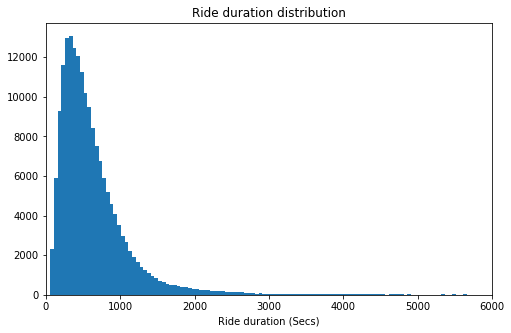

In [170]:
plt.figure(figsize=[8, 5])
plt.title('Ride duration distribution');
plt.xlabel('Ride duration (Secs)');
binsize=50
bins = np.arange(df['duration_sec'].min(), df['duration_sec'].max()+binsize, binsize)
plt.xlim([0,6000])
plt.hist(data=df, x='duration_sec', bins = bins);

As we can see the distribution is heavily skewed to the right. However, let's apply log transformation and zoom in on the plot

### Lets use log scale on the x axis and zoom in on the distribution

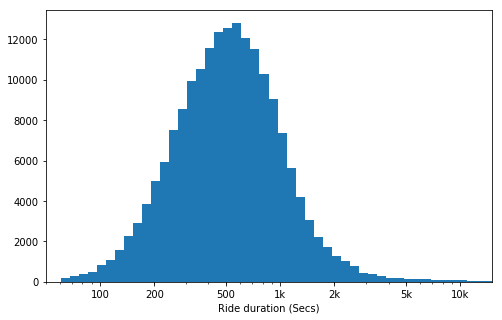

In [171]:
log_binsize = 0.05
bins = 10 ** np.arange(np.log10(df['duration_sec'].min()), np.log10(df['duration_sec'].max())+log_binsize, log_binsize)
plt.figure(figsize=[8, 5])
plt.hist(data = df, x = 'duration_sec', bins = bins)
plt.xscale('log')
plt.xlim([50,15000])
plt.xticks([100,200, 500,1e3, 2e3, 5e3, 10e3], [100,200, 500,'1k', '2k', '5k', '10k'])
plt.xlabel('Ride duration (Secs)')
plt.show()

From the above plots, we can say an average ride takes at about 700 secs/12 mins. Also, most rides take between 150 and 2000 secs.

### Let's look at the ride distance distribution

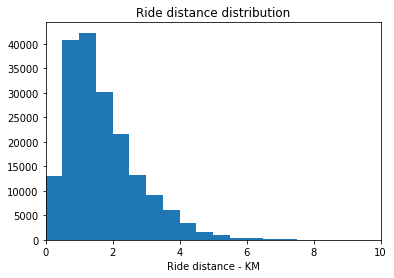

In [172]:
binsize = 0.5
bins = np.arange(df['ride_distance'].min(), df['ride_distance'].max()+binsize, binsize)
plt.hist(data=df,x='ride_distance',bins=bins);
plt.xlim([0,10])
plt.title('Ride distance distribution');
plt.xlabel('Ride distance - KM');

Here we can see most rides fall between 1 and 2 Kilometres(KM). Remember we are using orthodromic distance.

### Checking the number of subscribers and customers

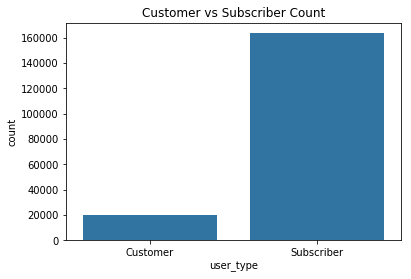

In [173]:
base_color = sb.color_palette()[0]
sb.countplot(data=df, x='user_type',color=base_color);
plt.title('Customer vs Subscriber Count');

Remember subscribers pay annually and customers usually get a 24-hour pass or 3-day pass. So it's obvious a lot of people pay annually for this bike services.

In [174]:
# user_count =df['user_type'].value_counts().sum()

# sub_count =df['user_type'].value_counts()[0]
# cus_count =df['user_type'].value_counts()[1]

# sub_count_prop = sub_count /user_count
# cus_count_prop = cus_count /user_count

# max_prop = sub_count / user_count
# tick_props = np.arange(0, max_prop, 0.1)
# tick_names = ['{:0.2f}'.format(v) for v in tick_props]

# sb.countplot(data=df, x='user_type');
# # Change the tick locations and labels
# plt.yticks(tick_props * user_count, tick_names)
# plt.ylabel('proportion');



### Examining the age distribution

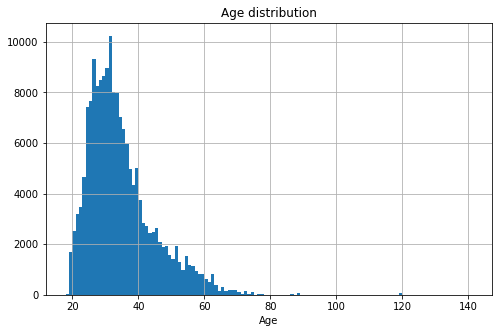

In [175]:
plt.figure(figsize=[8, 5])
plt.title('Age distribution');
plt.xlabel('Age');
binsize=1
bins = np.arange(df['age'].min(), df['age'].max()+binsize, binsize)
df['age'].hist(bins=bins);

A good number of people who use the bike services are between the ages of 20 - 40.

### How about the genders of members?

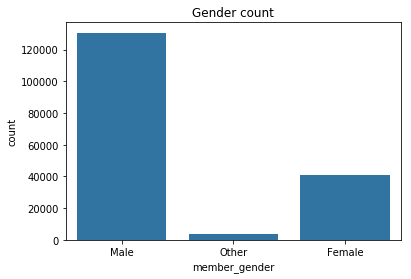

In [176]:
base_color = sb.color_palette()[0]
sb.countplot(data=df, x='member_gender',color=base_color);
plt.title('Gender count');

Men seem to love using these bike sharing services more than women.

### This bike sharing is popular for which age ranges?

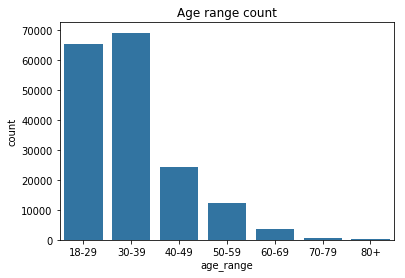

In [177]:
sb.countplot(data=df,x='age_range',color=base_color);
plt.title('Age range count');

18-29 and 30-39  have the highest number of users. It's safe to say from age 40, people rather use other means of transportation.

### At what hour of the day do most rides start ?

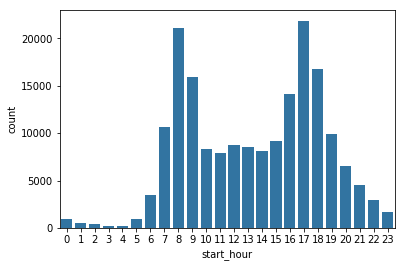

In [178]:
start_hour_count = df.groupby('start_hour').count()['duration_sec'].reset_index(name='count')
sb.barplot(data=start_hour_count,x='start_hour',y='count',color=base_color);

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7a5af47cc0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f7a5aecbf60>]], dtype=object)

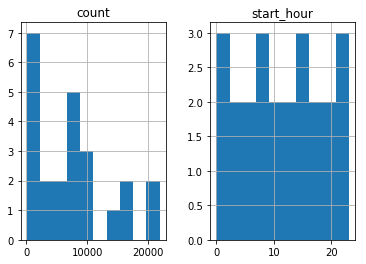

In [185]:
plt.scatter(data = df, x = 'duration', y = 'num_var2', c = 'num_var3')
plt.colorbar()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7a5b0dc7f0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f7a5b0d78d0>]], dtype=object)

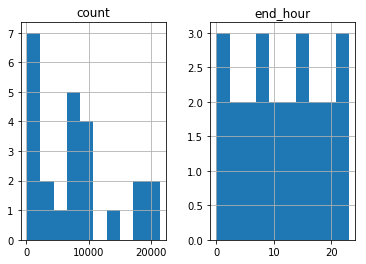

In [184]:
end_hour_count = df.groupby('end_hour').count()['duration_sec'].reset_index(name='count')
end_hour_count.hist()
# sb.barplot(data=end_hour_count,x='end_hour',y='count',color=base_color);
# df

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Here I looked at ride duration and ride distance. I discovered that the ride duration seemed to be heavily right skewed. I had to use log transform scale the x axis with a bin size of 0.05. This showed a normal distribution and that mst rides have an average duration of about 12 mins.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> * In order to get the ride distance, I used the haversine forumla to calculate the distance using longitude and latitude coordinates.
*  The age was calculated by subtracting 2019 from the member_birth_year

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

### Let's plot duration of ride against ride distance

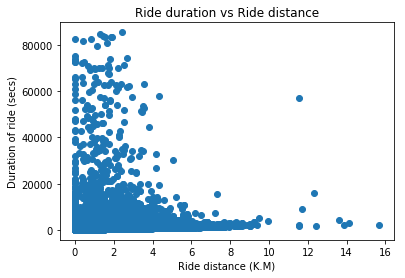

In [60]:
plt.scatter(data=df,x='ride_distance',y='duration_sec');
plt.xlabel('Ride distance (K.M)')
plt.ylabel('Duration of ride (secs)');
plt.title('Ride duration vs Ride distance');

We can notice an outlier in the ride distance.Let's investigate further

In [33]:
df.query('ride_distance > 60')

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,ride_distance,age,age_range,day_of_week,start_hour
112038,6945,2019-02-12 14:28:44.4020,2019-02-12 16:24:30.1580,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,300.0,Palm St at Willow St,37.317298,...,4780,Subscriber,1985.0,Female,No,69.47,34.0,30-39,Tuesday,14


This is probably as mistake or someone rode 69 K.M in about 115 mins.However, let's drop this row

In [38]:
df.drop(index = 112038, inplace = True )
df.query('ride_distance > 60')

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,ride_distance,age,age_range,day_of_week,start_hour


### Let's replot ride duration against ride_distance again and zoom in on the concentrated data points

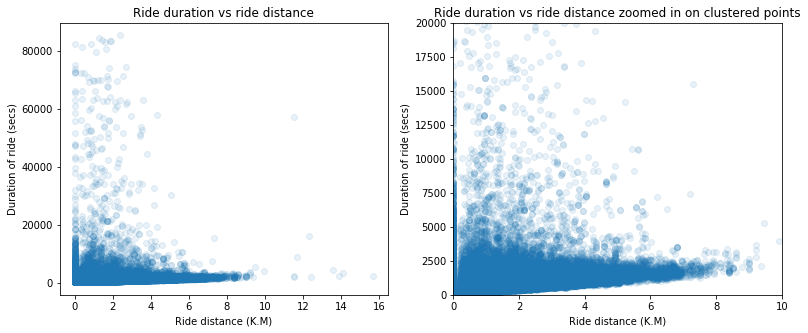

In [64]:
plt.figure(figsize = [20, 5])

plt.subplot(1, 3, 1)
plt.scatter(data=df,x='ride_distance',y='duration_sec',alpha=0.1);
plt.xlabel('Ride distance (K.M)')
plt.ylabel('Duration of ride (secs)');
plt.title('Ride duration vs ride distance');

plt.subplot(1, 3, 2)
plt.scatter(data=df,x='ride_distance',y='duration_sec',alpha=0.1);
plt.xlabel('Ride distance (K.M)')
plt.ylabel('Duration of ride (secs)');
plt.xlim([0,10])
plt.ylim([0,20000]);
plt.title('Ride duration vs ride distance zoomed in on clustered points');

From the above plots, we can see most of the ride duration seem to fall below 5000 secs and distance less than 8 KM

In [78]:
# plt.figure(figsize=[8, 5])
# # plt.ylim([1,20])
# plt.scatter(data=df,x='age',y='ride_distance');
# plt.xlabel('Age')
# plt.ylabel('Distance (K.M)')
# plt.title('Age vs distance');

In [84]:
# df.query('age_range =="60-69"').duration_sec.mean()

### Comparing average ride duration between age ranges

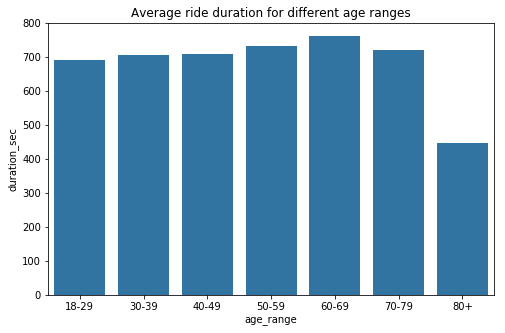

In [86]:
plt.figure(figsize=[8, 5])
age_mean = df.groupby('age_range')['duration_sec'].mean().reset_index()
sb.barplot(data=age_mean,x='age_range',y='duration_sec',color=base_color);
plt.title('Average ride duration for different age ranges');

You would expect that young people should below <40 year should have higher duration of rides. However, those with highest average ride time are people betweeen 60-69 years.

### Comparing average distance between age ranges

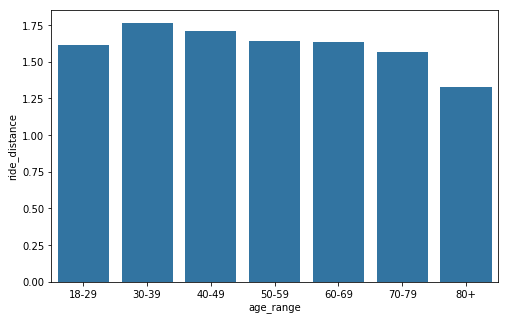

In [88]:
plt.figure(figsize=[8, 5])
age_mean = df.groupby('age_range')['ride_distance'].mean().reset_index()
sb.barplot(data=age_mean,x='age_range',y='ride_distance',color=base_color);

Even though 60-69 years people have longer ride duration. The younger adults < 40 have longer ride distance.

In [99]:
# plt.figure(figsize=[15, 8])
# dd = df.groupby(['age_range','duration_sec'])['ride_distance'].mean().reset_index()
# sb.barplot(data=dd,x='ride_distance',y='duration_sec')
# # age_mean = df.groupby('age_range')['ride_distance'].mean().reset_index()
# # day_df = df.groupby('day_of_week')['duration_sec'].mean().reset_index()
# # sb.barplot(data=age_mean,x='age_range',y='duration_sec');
# # sb.countplot(data = df, x = 'day_of_week', hue='age_range' );
# # plt.yscale('log')
# # sb.barplot(data = df, x = 'day_of_week',y='', hue='age_range' );


### Which day of the week do people have longest rides?

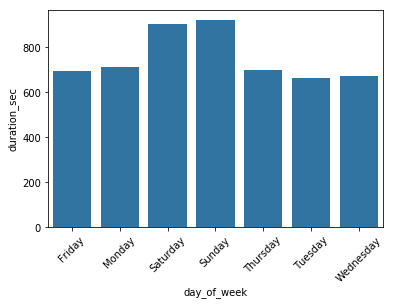

In [100]:
# which day of the week do people have the longest ride times.
day_df = df.groupby('day_of_week')['duration_sec'].mean().reset_index()
sb.barplot(data=day_df,x='day_of_week',y='duration_sec',color=base_color);
plt.xticks(rotation=45);

It makes sense that the weekends Sunday and Saturday are times when people make the most use of the bike sharing services.

In [110]:
# df[df.start_station_name=='Montgomery St BART Station (Market St at 2nd St)' 
# & df.end_station_name=='Palm St at Willow St']
# df.query('start_station_name == "Montgomery St BART Station (Market St at 2nd St)" and end_station_name =="Palm St at Willow St"')
# df.nlargest(5,'duration_sec')
# df.bike_id.value_counts(ascending=False)
# print(df.start_station_name.value_counts()[:5],'\n\n',df.end_station_name.value_counts()[:5])

In [50]:
df.start_station_id.nunique()

329

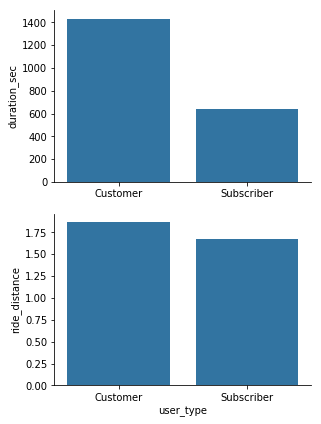

In [115]:
user_duration = df.groupby('user_type')['duration_sec'].mean().reset_index()
user_ride = df.groupby('user_type')['ride_distance'].mean().reset_index()
user_df = user_ride.merge(user_duration)

def barplot_grid(x, y, **kwargs):
    sb.barplot(x=x, y=y, color=base_color);

g = sb.PairGrid(data = user_df, y_vars = ['duration_sec', 'ride_distance'], x_vars = ['user_type'],
                size = 3, aspect = 1.5);
g.map(barplot_grid);

There are more subscribers than customers. However, customers have longer ride distances than subscribers. Hence, the people who subscribe don't normally use bikes regularly.

In [157]:
# df.start_hour.value_counts().to_frame()
# plt.barplot(data=start_hour_count,x='')

In [135]:

# ff = df.groupby('start_hour')['duration_sec'].mean().reset_index()

# plt.errorbar(data=ff,x='start_hour',y='duration_sec')
# df.head()

In [48]:
# sb.pointplot(data=df, x='user_type', y='duration_sec',
#               color = base_color)
# df.query('ride_distance > 60')
# # plot matrix of numeric features against categorical features.
# # can use a larger sample since there are fewer plots and they're simpler in nature.

# df_samp = df.sample(n=2000, replace = False)


# def boxgrid(x, y, **kwargs):
#     """ Quick hack for creating box plots with seaborn's PairGrid. """
#     default_color = sb.color_palette()[0]
#     sb.boxplot(x=x, y=y, color=default_color)


# # sb.boxplot(x=, y=y, color=base_color)
# plt.figure(figsize = [10, 10])
# g = sb.PairGrid(data = df_samp, y_vars = ['age', 'ride_distance'], x_vars = ['member_gender','user_type'],
#                 size = 3, aspect = 1.5)
# g.map(boxgrid)
# plt.show();

In [58]:
# df
# plt.ylim([1,20])
# .(data=df,x='age',y='ride_distance',hue='member_gender');
# plt.xlabel('Age')
# plt.ylabel('Distance (K.M)')
# plt.title('Age vs distance');

In [20]:
# dfc = df.copy()
# dfc['day'] = pd.to_datetime(dfc['start_time']).dt.day
# dfc['day'].value_counts()
# # dfc.head()

In [21]:
# sb.countplot(data=dfc,x='day')

In [50]:
# plt.figure(figsize = [8, 5])
# sb.heatmap(df.corr(), annot = True, fmt = '.3f',
#            cmap = 'vlag_r', center = 0)
# plt.show()

In [ ]:
# between customer and subscriber who has longer ride times?


In [ ]:
# which month has the highest ride time. - check average ride time per month

In [59]:
# df.columns

In [60]:
# numeric_cols = ['duration_sec','member_birth_year','ride_distance']

In [61]:
# plot matrix: sample 500 diamonds so that plots are clearer and they render faster
# print("diamonds.shape=",df.shape)
# df_samp = df.sample(n=500, replace = False)
# print("diamonds_samp.shape=",df_samp.shape)

# g = sb.PairGrid(data = df, vars = numeric_cols)
# g = g.map_diag(plt.hist, bins = 2000);
# g.map_offdiag(plt.scatter);

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Your answer here!

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Your answer here!

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

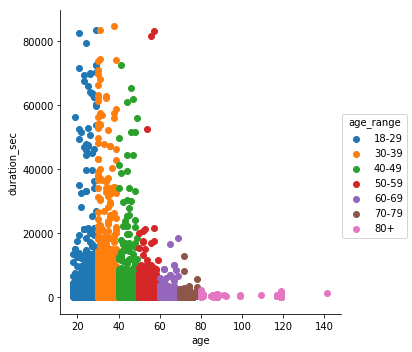

In [117]:
g = sb.FacetGrid(data = df, hue = 'age_range', size = 5)
g.map(plt.scatter, 'age', 'duration_sec')
g.add_legend();

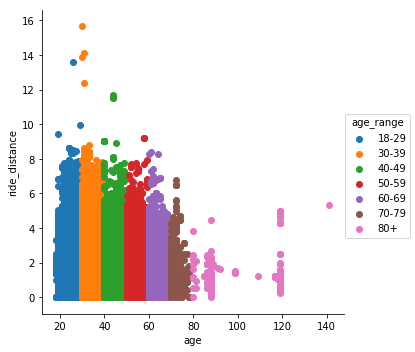

In [121]:
g = sb.FacetGrid(data = df, hue = 'age_range', size = 5)
g.map(plt.scatter, 'age', 'ride_distance')
g.add_legend();

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Your answer here!

### Were there any interesting or surprising interactions between features?

> Your answer here!

## Conclusions
>You can write a summary of the main findings and reflect on the steps taken during the data exploration.



> Remove all Tips mentioned above, before you convert this notebook to PDF/HTML


> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML or PDF` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!

